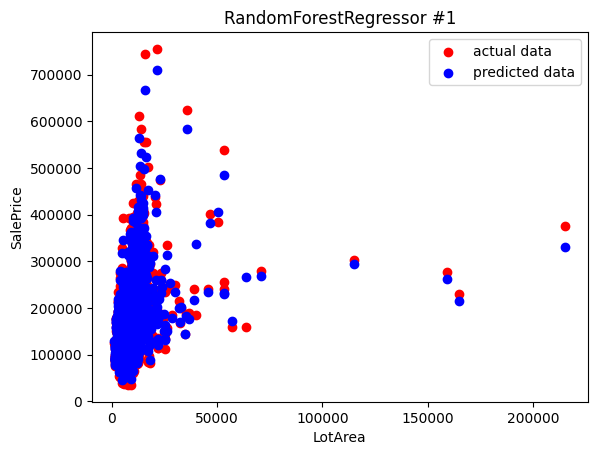

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer

houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')
numeric_features_names = ['KitchenAbvGr', 'GarageCars', 'FullBath', 'GarageArea', '1stFlrSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'Fireplaces', 'TotRmsAbvGrd', 'YearBuilt', 'BedroomAbvGr', 'HalfBath', 'LotArea', 'MSSubClass', 'YearRemodAdd', 'MoSold', 'BsmtFullBath', 'YrSold']
numeric_features = houses_train[numeric_features_names]
sale_price = houses_train['SalePrice']

from sklearn.ensemble import RandomForestRegressor
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(numeric_features)

X_train_imp = imp.transform(numeric_features)
clf = RandomForestRegressor(random_state=0)
clf.fit(X_train_imp, houses_train['SalePrice'])

import matplotlib.pyplot as plt
Y_predict = clf.predict(X_train_imp)
plt.scatter(numeric_features.LotArea, sale_price, color='red', label='actual data')
plt.scatter(numeric_features.LotArea, Y_predict, color='blue', label='predicted data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('RandomForestRegressor #1')
plt.legend()

In [3]:
X_test =  imp.transform(houses_test[numeric_features_names])
Y_test_predict = clf.predict(X_test)
arr = np.concatenate((np.array(houses_test['Id']).reshape(-1, 1), Y_test_predict.reshape(-1, 1)), axis=1)
np.savetxt("submission6.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')